# Homework #6



> Nathan Stenseng



## Problem 1:

A foot pedal for a musical instrument is modeled below with $k=2000$ N/m, $c=25$ kg/s, $m=25$ kg, and $F(t)=50cos(2\pi t)$ N. Compute the steady state reponse assuming the system starts from rest and using small angle approximations.

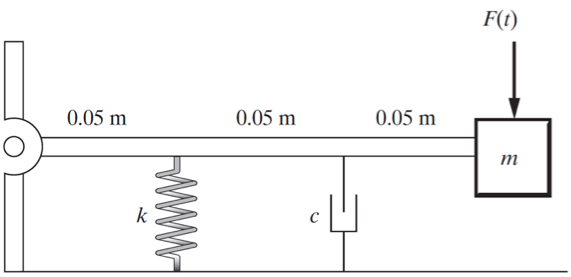

### Solution

The equation of motion for this system is:

$$m\ddot{x}+c\dot{x}+kx=50cos(2\pi t)$$

Where the deflection $x$ is different for each part of our bar. Since we are pivoting, we can say the deflection at any point is:

$$x=rsin(\theta)$$

Where $r$ is the distance from the pivot and $\theta$ is the angle changed. For small angles though, we can approximate our equation to be:

$$x=r\theta$$

This means we can rearrange our equation of motion to read:

$$0.15m\ddot{\theta}+0.1c\dot{\theta}+0.05k\theta=50cos(2\pi t)$$

We can solve this using an effective mass $M=0.15m$, effective damping $C=0.1c$, and an effect stiffness $K=0.05k$. Now we have the general equation:

$$\ddot{\theta}+2\zeta\omega_n\dot{\theta}+\omega_n^2\theta=50cos(2\pi t)$$

Where:

$\zeta = \frac{C}{2\sqrt{KM}}$

$\omega_n=\sqrt\frac{K}{M}$

The equation has the steady state solution:

$$A_scos(2\pi t)+B_scos(2\pi t)$$

Where:

$A_s = \frac{(\omega_n^2-\omega^2)f_o}{(\omega_n^2-\omega^2)^2+(2\zeta\omega_n\omega)^2}$

$B_s = \frac{2\zeta\omega_n\omega f_o}{(\omega_n^2-\omega^2)^2+(2\zeta\omega_n\omega)^2}$



In [ ]:
pip install pint

In [ ]:
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

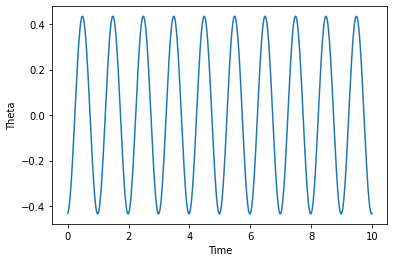

In [ ]:
m = Q_(25,"kg")
c = Q_(25, "kg/s")
k = Q_(2000, "N/m")

M = (0.15**2*m)
C = (0.1**2*c)
K = (0.05**2*k)

f_o = Q_(50,"N")*0.15/M
omega = Q_(2*np.pi,"rad/sec")


omega_n = np.sqrt(K/M)

zeta = C/(2*np.sqrt(K*M))

A_s = ((omega_n**2-omega**2)*f_o)/((omega_n**2-omega**2)**2+(2*zeta*omega_n*omega)**2)
B_s = (2*zeta*omega_n*omega*f_o)/((omega_n**2-omega**2)**2+(2*zeta*omega_n*omega)**2)

def theta(t):
  return A_s*np.cos(omega*t) + B_s*np.sin(omega*t)

t = np.linspace(0,10,5000)*ureg.seconds
plt.plot(t,theta(t))
plt.xlabel("Time")
plt.ylabel("Theta")
plt.show()

In [ ]:

X = np.sqrt(A_s**2+B_s**2)
print(X.to("m"))
X = f_o/np.sqrt((omega_n**2-omega**2)**2+(2*zeta*omega_n*omega)**2)
print(X)
phi = np.arctan((2*zeta*omega_n*omega)/(omega_n**2-omega**2))
print(phi)

0.4340739895691285 meter
0.4340739895691285 meter
-0.09103794402148681 radian


## Problem 2:

Consider the base-excitation problem for the configuation shown below. In this case, the base motion is a displacement transmitted throguh a dashpot or pure damping element. Derive an expression for the force transmitted to the support in steady state.

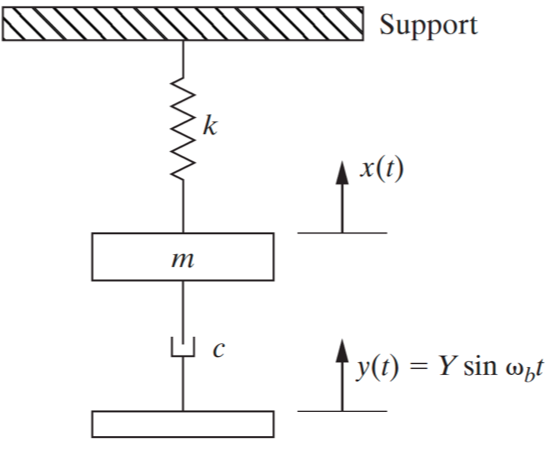

### Solution

We know that the force of the spring is due to the elongation of the spring which is:

$$F_k=-k(x)$$

While the force of the damper is due to the difference in the velocities from the perspective of the damper:

$$F_c=-c(\dot{x}-\dot{y})$$

Using Newtons second law, we get:

$$\sum F=m\ddot{x}=-kx-c(\dot{x}-\dot{y})$$

This means that:

$$\ddot{x}+\frac{c}{m}\dot{x}+kx=c\dot{y}$$

We can find $\dot{y}$ by differentiating $y$ which gives us:

$$\dot{y}=\omega_bYcos(\omega_b t)$$

We can now rearrange our equation of motion to:

$$\ddot{x}+2\zeta\omega_n\dot{x}+\omega_n^2x=2\zeta\omega_n\omega_b Ycos(\omega_b t)$$

To find the steady state response, we will find the particular solution to this equation which will have the form:

$$x_p(t)=Acos(\omega_b t) + Bsin(\omega_b t)$$

Where:

$$\dot{x}_p(t)=-\omega_bAsin(\omega_b t) + \omega_b Bcos(\omega_b t)$$

$$\ddot{x}_p(t)=-\omega_b^2Acos(\omega_b t) - \omega_b^2 Bsin(\omega_b t)$$

Plugging these into our equation gives:

$$-\omega_b^2Acos(\omega_b t) - \omega_b^2 Bsin(\omega_b t) - 2\zeta\omega_n\omega_bAsin(\omega_b t) + 2\zeta\omega_n\omega_bBcos(\omega_b t) +\omega_n^2Acos(\omega_b t) + \omega_n^2Bsin(\omega_b t)=2\zeta\omega_n\omega_b Ycos(\omega_b t)$$

This gives the following system of equation:

$$
\begin{cases} 
      -\omega_b^2 A + 2\zeta\omega_n\omega_b B + \omega_n^2 A = 2\zeta\omega_n\omega_bY\\
      -\omega_b^2 B - 2\zeta\omega_n\omega_b A + \omega_n^2 B= 0
  \end{cases}
$$

Which can be rewritten as:

$$
\begin{cases} 
      (\omega_n^2 -\omega_b^2) A + 2\zeta\omega_n\omega_b B = 2\zeta\omega_n\omega_bY\\
       - 2\zeta\omega_n\omega_b A + (\omega_n^2 - \omega_b^2)B= 0
  \end{cases}
$$

We can also substitute in $r=\frac{\omega_b}{\omega_n}$:

$$
\begin{cases} 
      \omega_n^2(1 - r^2) A + 2\zeta\omega_n^2r B = 2\zeta\omega_n^2rY\\
       - 2\zeta\omega_n^2r A + \omega_n^2(1 - r^2)B= 0
  \end{cases}
$$

Now the natural frequency cancels out and we get:

$$
\begin{cases} 
      (1 - r^2) A + 2\zeta r B = 2\zeta rY\\
       - 2\zeta r A + (1 - r^2)B= 0
  \end{cases}
$$

We can rewrite equation 2 to say:

$$B=\frac{2\zeta rA}{(1-r^2)}$$

and plug this into equation 1 to say:

$$(1-r^2)A+\frac{(2\zeta r)^2A}{(1-r^2)}=2\zeta rY$$

This means:

$$
\begin{cases} 
      A = \frac{(1-r^2)(2\zeta r)Y}{(1-r^2)^2+(2\zeta r)^2}\\
      B = \frac{(2\zeta r)^2Y}{(1-r^2)^2+(2\zeta r)^2}
  \end{cases}
$$

Thererfore our particular solution, which is our steady state solution, would be:

$$x_p(t)=\frac{(1-r^2)(2\zeta r)Y}{(1-r^2)^2+(2\zeta r)^2}cos(\omega_b t) + \frac{(2\zeta r)^2Y}{(1-r^2)^2+(2\zeta r)^2}sin(\omega_b t)$$

We know that the steady state force applied to the support will be:

$$\sum F = kx_p$$

This can be rewritten:

$$F = \frac{(k)(1-r^2)(2\zeta r)Y}{(1-r^2)^2+(2\zeta r)^2}cos(\omega_b t) + \frac{(k)(2\zeta r)^2Y}{(1-r^2)^2+(2\zeta r)^2}sin(\omega_b t)$$


## Problem 3:

Consider the simple model of a building subject to ground motion suggested in the figure below. The building is modeled as a single-degree-of-freedom spring-mass system where the building mass is lumped atop two beams used to model the walls of the building in bending. Assume the ground motion is modeled as having amplitude of $0.1$ m at a frequency of $7.5$ rad/s. Approximate the building mass by $10^5$ kg and the stiffness of each wall by $3.519\times 10^6$ N/m. Compute the magnitude of the deflection of the top of the building.

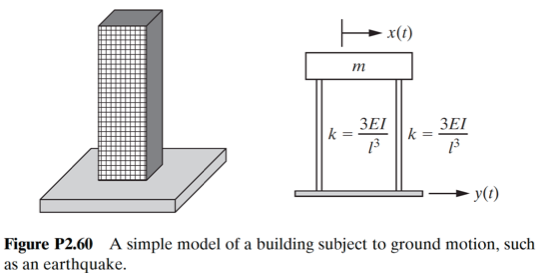

### Solution

The relative delfection of the ground with respect to the roof it:

$$\delta = (x-y)$$

So our equation of motion will be:

$$m\ddot{x}+kx = ky$$

This can be rearranged to:

$$\ddot{x}+\omega_n^2x=\omega_n^2y$$

We know from the problem statement that:

$$y(t)=Ysin(\omega_d t)$$

Where:

$Y = 0.1$ m

$\omega_d = 7.5$ rad/s

Plugging this into our equation of motion gives:

$$\ddot{x}+\omega_n^2x=\omega_n^2Ysin(\omega_d t)$$

With zeros initial conditions, we will only need the steady state response which will be of the form:

$$x_p(t)=Asin(\omega_d t)$$

Differentiating this and plugging it back into our equation of motion gives:

$$-\omega_d^2Asin(\omega_d t) + \omega_n^2Asin(\omega_d t) = \omega_n^2Ysin(\omega_d t)$$

This tells us that:

$$(\omega_n^2-\omega_d^2)A=\omega_n^2Y$$

We can plug in $r=\frac{\omega_d}{\omega_n}$

$$A = \frac{Y}{1-r^2}$$

Since $A$ is the amplitude and when $sin(\omega t)$ is maxed out at $1$, the magnitude of deflection will be $A$.

## Problem 4:

A fan of $45$ kg has an unbalance that creates a harmonic force. A spring-damper system is designed to minimize the force transmitted to the base of the fan. A damper is used having a damping ration of $\zeta=0.2$. Calculate the required spring stiffness so that only $10$% of the force is transmitted to the ground when the fan is running at $10,000$ rpm.

### Solution

Per our problem statment, we want the force transmitted to the ground to be 10% of the magnitude of the force oscilating the fan:

$$F_T = 0.1F_o$$

Where with our equation of motion as:

$$\ddot{x} + \frac{c}{m}\dot{x} + \frac{k}{m}x = \frac{m_oe\omega_r^2}{m}sin(\omega_r t)$$

We can say:

$$F_o = m_oe\omega_r^2$$

We also know that the force transmitted to the base is:

$$F = -m\ddot{x}$$

since the base is completly canceling the inertial forces of the mass. 

If we look at the steady state solution, we know that: 

$$x_p = Xsin(\omega_r t + \theta)$$

and 

$$\ddot{x}_p(t) = -\omega_r^2x_p(t)$$

Where:

$$X = \frac{F_o}{m\sqrt{(\omega_n^2-\omega_r^2)^2+(2\zeta\omega_n \omega_r)^2}}$$

On our base, we can just consider the magnitude of the force which will be transmitted:

$$F_t = \frac{F_o m\omega_r^2 }{m\sqrt{(\omega_n^2-\omega_r^2)^2+(2\zeta\omega_n \omega_r)^2}}$$

Plugging this into our initial equation gives:

$$\frac{F_o m\omega_r^2 }{m\sqrt{(\omega_n^2-\omega_r^2)^2+(2\zeta\omega_n \omega_r)^2}} = 0.1F_o$$

We can cancel out terms to leave:

$$\frac{\omega_r^2 }{\sqrt{(\omega_n^2-\omega_r^2)^2+(2\zeta\omega_n \omega_r)^2}} = 0.1$$

We will need to issolate the term $\omega_n$ since that is the only term that considers $k$:

$$(\omega_n^2-\omega_r^2)^2+(2\zeta\omega_n \omega_r)^2 = 10\omega_r^4$$

$$\omega_n^4-2\omega_n^2\omega_r^2+\omega_r^4 + 4\zeta^2\omega_r^2\omega_n^2=10\omega_r^4$$

$$\omega_n^4+(2\zeta^2-1)2\omega_r^2\omega_n^2 - 9\omega_r^4= 0$$

Now we can convert this to be in terms of $k$ using the fact that $\omega_n^2=\frac{k}{m}$:

$$\frac{k^2}{m^2} +\frac{(2\zeta^2-1)2\omega_r^2}{m}k - 9\omega_r^4 = 0$$

Using the quadratic formula gives our $k$ values:


In [ ]:
m = Q_(45, "kg")
zeta = Q_(0.2, "dimensionless")
omega_r = Q_(10000, "rpm")

a = 1/m**2
b = ((2*zeta**2 - 1)*2*omega_r**2)/m
c = -9*omega_r**4

k_1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
k_2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)

print(k_1.to("MN/m").round(2))
print(k_2.to("MN/m").round(2))

200.25 meganewton / meter
-109.45 meganewton / meter


We will ignore the negative solution and only consider k = 200.25 MN/m.

## Computational Problem 1:


Plot the responce of the following system assuming zero initial conditions:

Consider a typical unbalanced machine problem as given in the figure below with a machine mass of $120$ kg, a mount stiffness of $800$ kN/m, and a damping value of $500$ kg/s.

The out-of-balance force is measured to be $374$ N at a running speed of $3000$ rev/min.

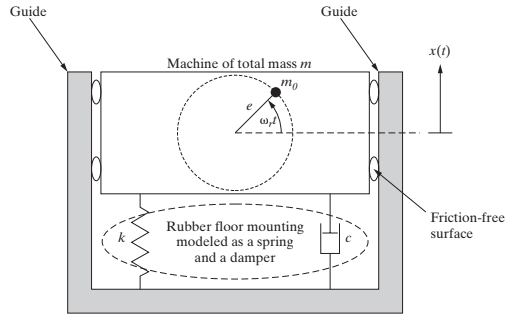

## Solution

We know for an unbalenced machine the equation of the motion is:

$$m\ddot{x} + c\dot{x} + kx = em_o\omega_r^2sin(\omega_r t)$$

Which can be generalized using:

$$F_o = em_o\omega_r^2$$

Creating a state space model for this system gives:

$$\dot{x}_1 = x_2$$

$$\dot{x}_2 = -\frac{c}{m}x_2 - \frac{k}{m}x_1 + \frac{F_o}{m}sin(\omega_r t)$$

Which has solutions graphed below.

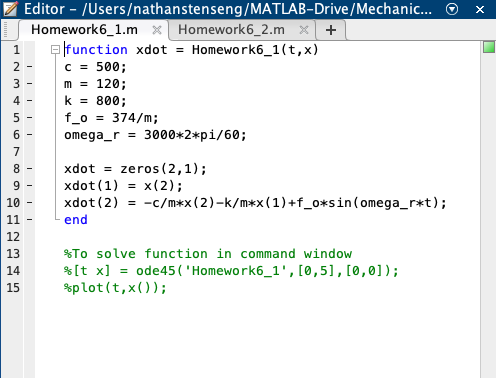

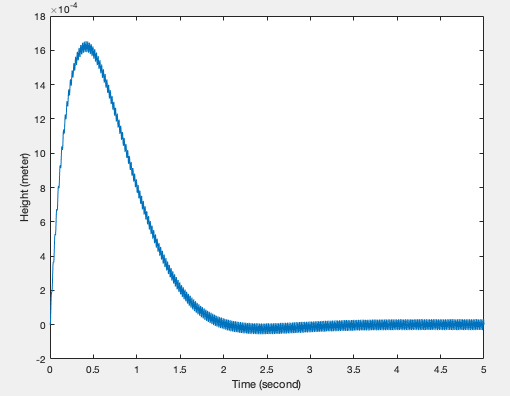

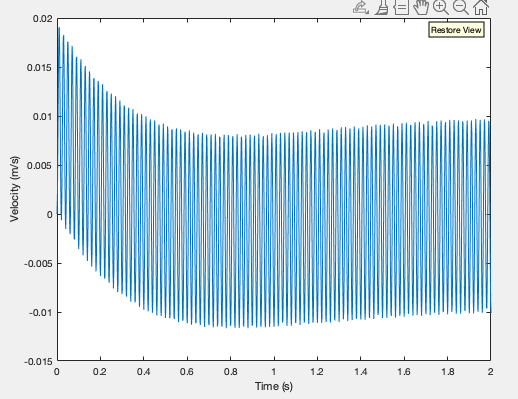

## Computational Problem 2:

Using Matlab, explote the behavior of the system assuming zero inital conditions:

$$100\ddot{x}+30\dot{x}+100x=a\ddot{x}+ax$$

Where $a$ is a constant between $[-1000,1000]$. When is the system under, over, or critically damped? Are there any instabilites in the solution?

## Solution

Rearranging this equation as:

$$(100-a)\ddot{x} + 30 \dot{x} + (100-a)x=0$$

Lets us explore using varied effective masses and effective spring constants:

The damping ratio is given by:

$$\zeta = \frac{30}{2\sqrt{(100-a)^2}}$$

For critical damping:

$$1=\frac{30}{2\sqrt{(100-a)^2}}$$

And solving this gives:

$$a = 85$$

This means that the system is overdamped if $a>85$ and underdamped if $a<85$.

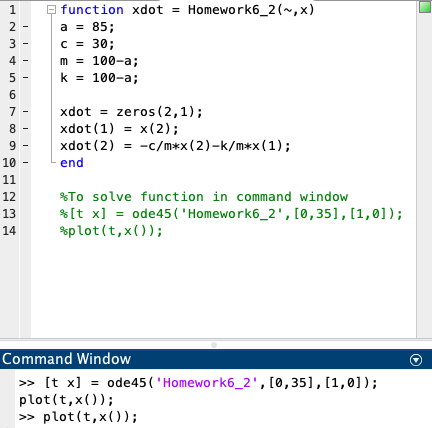

And initial condition of $x_o = 1$ m had to be added because with all zero initial conditions, the system was not excited.

The critically damped graph is given below:

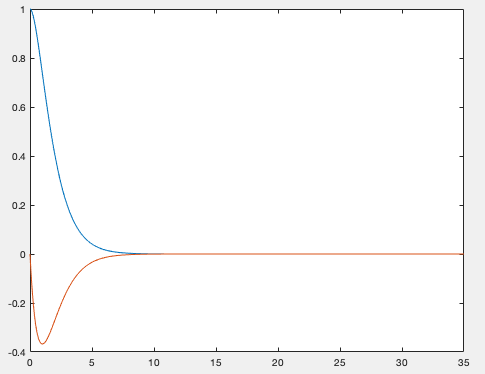

For an underdamped system with $a=55$ The response is:

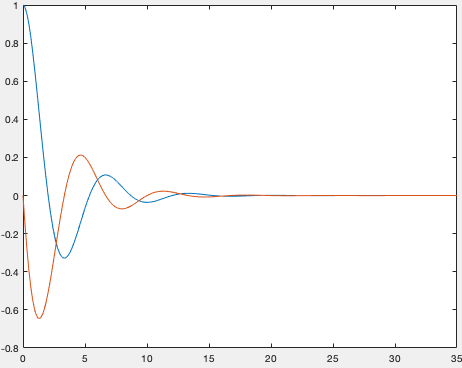

And for an overdamped system with $a=95$ the response is:

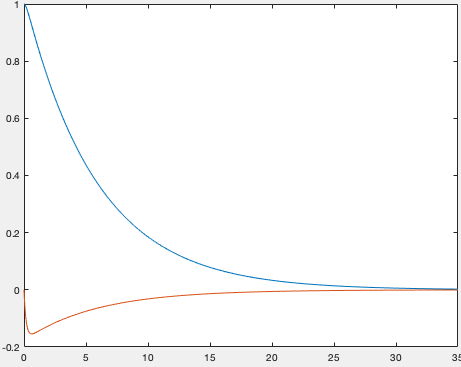